In [1]:
# Importing the necessary libraries for analysis.

import pandas as pd
import numpy as np
import sqlite3
import string as str
import seaborn as sns
import matplotlib.pyplot as plt


# DATA PREPARATION
In the previous section we looked at each data, just barely, but we found that some of them contained data quality issues that would impact our analysis negatively. In this section, we are going to prepare all the datasets for analysis.

This process will include;
- Data filtration

- Data cleaning

- Data reformatting

- Data integration

## `rt.reviews.tsv`
Our initial analysis revealed that the dataset under review contained missing records in several columns as well as duplicated records. In this section we are going to clean this dataset, preparing it for analysis.

We will be using the .dropna() and .drop_duplicates() pandas function to clean it.


In [2]:
# To delete when merging notebooks
rt_reviews = pd.read_csv("data/raw/zippedData/rt.reviews.tsv.gz", compression= 'gzip', delimiter= '\t', encoding= 'latin-1', index_col= False)
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [3]:
# This code helps us understand the structure of our data
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


From the summary above, we can confirm that we have null values in the `review`, `rating`, `critic`, and `publisher` columns.

As most of the columns contain categorical data, and replacing them would introduce noise into the data, we are going to drop them all.

In [4]:
# We are going to drop the rows because there is no way to fill them.
# We are using the .dropna() function.

rt_reviews = rt_reviews.dropna(subset= ['review', 'rating', 'critic', 'publisher'])

# Validating
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33988 entries, 0 to 54424
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          33988 non-null  int64 
 1   review      33988 non-null  object
 2   rating      33988 non-null  object
 3   fresh       33988 non-null  object
 4   critic      33988 non-null  object
 5   top_critic  33988 non-null  int64 
 6   publisher   33988 non-null  object
 7   date        33988 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.3+ MB


In the reviewing code above, we notice that the top_critic column contains a lot of 0s, we are going to inspect it further, to figure out if it is a placeholder or not.

In [5]:
rt_reviews['top_critic'].value_counts()

0    26811
1     7177
Name: top_critic, dtype: int64

We conclude that it is not a placeholder.

In [6]:
#  Save cleaned data to a new file

# rt_reviews.to_csv('data/cleaned/rt_reviews.csv', index= False)

## `rt.movies_info.tsv`
During the initial exploration, we found out that out of the 12 columns in this dataset, 11 contain null values ranging from as low as 3 to 1220 null values. Additionally, we found that data contains several columns where the records were stored as wrong datatypes.

In this section we are going to work on those issues. This is important as if left unchecked, missing values and inaccurately stored records could lead to inaccuracies and misleading results, which subsequently lead to misleading insights.

This process is going to involve;
- Dropping missing values

- Dropping columns

- Data conversion


In [7]:
# We are reading the data into the 'rt_movies, variable using the .read_csv() pandas function to be able to access the data in form of a dataframe

rt_movies = pd.read_csv("data/raw/zippedData/rt.movie_info.tsv.gz", compression= 'gzip', delimiter= '\t', encoding= 'latin-1', index_col= False)
rt_movies.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
# First we are going to look at the data's structure
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


From the above summary, we can see that the 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'studio', and 'runtime' columns contain missing values.

Due to their natures, we are going to deal with them in two ways, dropping and filling them. We are going to drop the ones with lesser missing values as they will not lead to data loss and  the ones with lesser non-null values, we are going to drop the whole columns.
       

In [9]:
# Dropping null values

rt_movies = rt_movies.dropna(subset= ['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'runtime'])

# Dropping columns
rt_movies = rt_movies.drop(['currency', 'box_office', 'studio'], axis= 1)


Lastly, the 'theater_date' and 'dvd_date' columns have been stored as objects. In the next code we will be converting these to their appropriate datatypes.

In [10]:
# The next step is converting release_date to date. This is essential for yearly analysis. 

rt_movies['theater_date'] = pd.to_datetime(rt_movies['theater_date'])
                                                                                      
rt_movies['dvd_date'] = pd.to_datetime(rt_movies['dvd_date'])

# Validating
rt_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 1558
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            881 non-null    int64         
 1   synopsis      881 non-null    object        
 2   rating        881 non-null    object        
 3   genre         881 non-null    object        
 4   director      881 non-null    object        
 5   writer        881 non-null    object        
 6   theater_date  881 non-null    datetime64[ns]
 7   dvd_date      881 non-null    datetime64[ns]
 8   runtime       881 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 68.8+ KB


In [11]:
# Saving the cleaned data to a new file

#rt_movies.to_csv('data/cleaned/rt_movies.csv', index= False)

## `tmdb.movies.csv`
This dataset is clean and ready for analysis. It contains no null values, no duplicates and all the columns have been stored as the appropriate datatypes.

In [12]:
# We are reading the data into the 'tmdb_movies' variable using the .read_csv() pandas function to be able to access the data in form of a dataframe

tmdb_movies = pd.read_csv("data/raw/zippedData/tmdb.movies.csv.gz", compression= 'gzip', delimiter= ',', encoding= 'latin-1', index_col= False)
tmdb_movies.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [13]:
# Validating
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [14]:
# Save the clean data in a new file

#tmdb_movies.to_csv('data/cleaned/tmdb_movies.csv', index= False)

## `tn.movies_budget.csv`
In this section we are going to prepare our data for analysis. In the previous section, we did a data exploration to understand out data better. We found that the `tn.movie_budgets.csv` file was mostly clean, with no null values and duplicates. However, the data contains numerical values stored as objects. 

To ensure the data is appropriate for analysis, we are going to convert the numerical values to integers enable proper calculations, aggregations, and statistical analysis.
Additionally, the `release_date` column contains dates stored as objects, therefore we are going to convert the column to a datetime datatype.

This process will involve;
- Data reformatting

- Data convertion 

- Renaming

In [15]:
# Reading the file into the variable 'movie_budgets'.
movie_budgets = pd.read_csv("data/raw/zippedData/tn.movie_budgets.csv.gz", compression= 'gzip', delimiter= ',', encoding= 'latin-1', index_col= False)

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


#### Data conversion
In this section we are going to convert numerical data and dates stored as objects to integers and dates respectively.

In [16]:
# We are confirming the data types of each columns.

movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The above code confirms our findings in the previous section.

In [17]:
# Before converting the numerical columns to integers, we are first going to strip the dollar sign ($) and replace the commas with nothing.
# The dollar sign and commas are characters, therefore the code will throw an error if we try to convert the columns without stripping and replacing the sign and the punctuation mark.

columns_to_strip = ['production_budget', 'domestic_gross', 'worldwide_gross']

movie_budgets[columns_to_strip] = movie_budgets[columns_to_strip].apply(lambda x: x.str.strip('$'))

movie_budgets[columns_to_strip] = movie_budgets[columns_to_strip].apply(lambda x: x.str.replace(',', ''))



In [18]:
# Converting production_budget, domestic_gross and worldwide_gross to integers
# We are using the .astype() method to convert them.
# The reason we cannot convert all of them at the same time, 'pd.to_numeric' only accepts series, lists, tuples and arrays.

movie_budgets['production_budget'] = pd.to_numeric(movie_budgets['production_budget'], errors='coerce').astype('Int64')

movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'], errors='coerce').astype('Int64')

movie_budgets['worldwide_gross'] = pd.to_numeric(movie_budgets['worldwide_gross'], errors='coerce').astype('Int64')

In [19]:
# By stripping the dollar sign from the rows, it is difficult to know the currency of the revenues.
# In this code we are going to add the currency to the columns.

movie_budgets.rename(columns={'production_budget': 'production_budget($)', 'domestic_gross': 'domestic_gross($)', 'worldwide_gross': 'worldwide_gross($)'}, inplace=True)

In [20]:
# The next step is converting release_date to date. This is essential for year on year (YoY) analysis on both the revebues and further analysis. 

movie_budgets['release_date'] = pd.to_datetime(movie_budgets['release_date'])

In [21]:
# We are also going to strip some characters in the movie column.
movie_budgets['movie']= movie_budgets['movie'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

In [22]:
# Validating that the changes we've made have reflected.
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5782 non-null   int64         
 1   release_date          5782 non-null   datetime64[ns]
 2   movie                 5782 non-null   object        
 3   production_budget($)  5782 non-null   Int64         
 4   domestic_gross($)     5782 non-null   Int64         
 5   worldwide_gross($)    5782 non-null   Int64         
dtypes: Int64(3), datetime64[ns](1), int64(1), object(1)
memory usage: 288.1+ KB


In [23]:
movie_budgets.head()

,id,release_date,movie,production_budget($),domestic_gross($),worldwide_gross($)
0,1,2009-12-18,avatar,425000000,760507625,2776345279
1,2,2011-05-20,pirates of the caribbean on stranger tides,410600000,241063875,1045663875
2,3,2019-06-07,dark phoenix,350000000,42762350,149762350
3,4,2015-05-01,avengers age of ultron,330600000,459005868,1403013963
4,5,2017-12-15,star wars ep viii the last jedi,317000000,620181382,1316721747


In [24]:
# Save cleaned data in a new file

#movie_budgets.to_csv('data/cleaned/movie_budgets.csv', index= False)

Now we have a cleaned data with the appropriate data types and easy to interpret columns.

## `bom.movie_gross`
In the previous section, we carried out data exploration which led us to the conclusion that the `bom.movie_gross.csv` file was mostly clean, despite having several null values and the data contains numerical values stored as objects. 

To ensure the data is appropriate for analysis, we are going to convert the numerical values to integers enable proper calculations, aggregations, and statistical analysis.
Additionally, the `release_date` column contains dates stored as objects, therefore we are going to convert the column to a datetime datatype.

This process will involve;
- Data cleaning

- Data convertion 

- Renaming


In [25]:
# # Reading the file into the variable 'movie_budgets'.

movie_gross = pd.read_csv("data/raw/zippedData/bom.movie_gross.csv.gz", compression= 'gzip', delimiter= ',', encoding= 'latin-1', index_col= False)
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [26]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


From the code above we identify that the foreign_gross column contains numerical values stored as objects. In the next code we are going to convert that column to a float.

In [27]:
# Before converting the numerical columns to floats, we are first going to replace the commas with nothing.
# The commas are characters, therefore the code will throw an error if we try to convert the columns without replacing it.

movie_gross['foreign_gross'] = movie_gross['foreign_gross'].str.replace(',', '').astype('float')

# We are also going to strip some characters in the movie column.
movie_gross['title']= movie_gross['title'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

In [28]:
# We are making a copy of the uncleaned data for the upcoming analysis.
unclean_movie_gross = movie_gross.copy()

In [29]:
# Filling null values
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].fillna(0)
movie_gross['studio'] = movie_gross['studio'].fillna('unknown')

In [30]:
# Domestic_gross

In [31]:
# Validation
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


## `im.db` data preparation
In this section, we are going to clean the `im.db` database. In the previous section, we explored the database and realized that several tables contained unusable data ranging from null values to duplicates. In this section we are going to go table by table, exploring what else needs cleaning or formatting.

First, we are going to take a look at the database's ERD

![movie data erd](https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project-v3/main/movie_data_erd.jpeg)

From this diagram, we are going to 

In [32]:
# Connecting the database and reading it into the `conn` variable 
conn = sqlite3.connect('data/raw/im.db')

# In this code we are reading the tables into get the lay of the database
tables = pd.read_sql("""SELECT *
                      FROM sqlite_master""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


### `movie_basics`
After exploring this table in the previous section, we found that it contains 146144 rows and 6 columns. Out of the 6 columns, 3 contain null values. In this section we are going to clean this data by dropping or replacing null values depending on the relevance of the column. We will also explore further to uncover any data quality issues that were missed in the previous section. 


In [33]:
# Using the sqlite3 library, we are going to query the movie_basics table, selecting everything.
movie_basics = pd.read_sql("""SELECT *
                               FROM movie_basics""", conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [34]:
# This code gives us the overview of the table, showing us the columns, datatypes and how many null values the table has.
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The code above proves what the initial exploration pointed out. It also reveals that the `start_year` column is stored as an object but it is a datetime data type. 

In the next couple of codes we are going to;
- deal with the missing values 

- perform data conversion.

In [35]:
# We are aware of the columns that have missing values, but to make good decisions, we are looking at the count of missing vakues in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.
missing = movie_basics.isnull().sum()

missing[missing > 0].sort_values(ascending=False)

runtime_minutes    31739
genres              5408
original_title        21
dtype: int64

As I mentioned before, we are going to decide how to deal with missing values depending on the relevance of the columns and the number of missing values. From the above code, we notice that we do not have a lot of missing values, when it comes to the columns' relevance, all of them are crucial for the analysis ahead, therefore we are going to replace some and drop others.

`runtime_minutes`

This column contains 31739 missing values, for this column we are going to replace the missing values with the median value of the column. This is because this will less likely influence the distribution of the data while also preventing the loss of valueable data.

In [36]:
# This code is replacing all the missing values in the `runtime_minutes` column with the median of the column. 
# The reason we use this method is because runtime enatils important information crucial to our analysis. 
# This decision is also better than dropping the rows as it is less likely to influence the distribution. 

movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].mean(), inplace= True)

`original_title`

This column only contains 21 missing values, while it is okay to drop those rows, replacing the null values with corresponding data from the `primary_title` seems appropriate.

In [37]:
# Most of the rows in the table contain the same entries in both the `original_title` and the `primary_title`.
# This code simply fills the null values in the `original_title` column with corresponding data from the `primary_title` column.
 
movie_basics['original_title'] = movie_basics['original_title'].fillna(movie_basics['primary_title'])

`genres`

Containing 5408 missing values, there is no other way to deal with these missing values other than to drop them. We are using the .dropna() method and specifying the rows we need dropped are from what column.

In [38]:
# For the `genres` column, we decided to drop the null values as there is no way to replace them and dropping them is less likely to cause data loss.

movie_basics = movie_basics.dropna(subset= ['genres'])

In [39]:
# Validation that we have dealt with all the null values.

missing = movie_basics.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

Next, we are dealing with data conversion from object to datetime. When dates are stored as objects, pandas cannot perform date-specific operations such as calculating time differences, extracting date components, or resampling time series data. Converting to datetime enables these functionalities.

In [40]:
movie_basics['movie_id'] = movie_basics['movie_id'].astype('str')
movie_basics['start_year'] = movie_basics['start_year'].astype('int')

# renaming the start_year column
movie_basics.rename(columns= {'start_year': 'year'})

<ipython-input-40-241c334054ee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics['movie_id'] = movie_basics['movie_id'].astype('str')
<ipython-input-40-241c334054ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics['start_year'] = movie_basics['start_year'].astype('int')


,movie_id,primary_title,original_title,year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,86.187247,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.000000,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,86.187247,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,86.187247,Comedy


In [41]:
# We are also going to strip down the primary_title column to lowercase.
movie_basics['primary_title'] = movie_basics['primary_title'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

<ipython-input-41-2ccc3bb21bfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics['primary_title'] = movie_basics['primary_title'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)


In [42]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140736 non-null  object 
 1   primary_title    140736 non-null  object 
 2   original_title   140736 non-null  object 
 3   start_year       140736 non-null  int32  
 4   runtime_minutes  140736 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 7.0+ MB


### `directors`
Prior investigations found that this table contains 127639 duplicate records. In this section we are going to explore the table further and determine whether the data are indeed duplicates or just contain the same ids as the table only contains ids.

This process will include;
- Dropping duplicates

First, we are reading the table into the `directors` dataframe using pandas read_sql() function. 

In [43]:
# Using the sqlite3 library, we are going to query the directors table, selecting everything.
directors = pd.read_sql("""SELECT *
                           FROM directors""", conn)

directors

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502
...,...,...
291169,tt8999974,nm10122357
291170,tt9001390,nm6711477
291171,tt9001494,nm10123242
291172,tt9001494,nm10123248


In [44]:
# This code helps us understand the structure of our table

directors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


Confirming that the data contains duplicates, we are using the .duplicated() function to return booleans of all the rows that contain duplicates and the .sum() function to count them.

In [45]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = directors.duplicated().sum()
duplicates

127639

To decide the next cause of action, we are examining the duplicate records further to make sure we will not be dropping data that are not in fact, duplicated. We are filtering the duplicated records and storing them in the `all_duplicate_rows` variable.

In [46]:
# We are filtering out duplicated data and storing them in a variable for further inspection.

all_duplicate_rows = directors[directors.duplicated(keep=False)]
print(all_duplicate_rows)

         movie_id   person_id
2       tt0835418   nm0151540
3       tt0835418   nm0151540
8       tt0996958   nm2286991
9       tt0996958   nm2286991
10      tt0999913   nm0527109
...           ...         ...
291160  tt8992390   nm0504267
291161  tt8992390   nm0504267
291162  tt8992390   nm0504267
291167  tt8999892  nm10122247
291168  tt8999892  nm10122247

[182316 rows x 2 columns]


The code above clarifies that the table truly contains duplicate records. The next cause of action is deleting the duplicates. Dropping them is essential as duplicate data negatively impacts data quality, analysis, and overall business operations. It can lead to inaccuracies in reporting, skewed insights, and ultimately hinders informed decision-making. 

In [47]:
# To prevent the duplicates from negatively impacting the data, we are dropping them using the .drop_duplicates() function.

directors = directors.drop_duplicates()

In [48]:
# Finally, to validate the codes, we are using the .duplicated() and .sum() functions to count the number of duplicated records, confirming that the number is 0

duplicates = directors.duplicated().sum()
duplicates

0

### `known_for`
According to the previous section, this table is mostly clean and has no data quality issues.

In [49]:
# Using the sqlite3 library, we are going to query the known_for table, selecting everything.

known_for = pd.read_sql("""SELECT *
                           FROM known_for""", conn)

known_for

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534
...,...,...
1638255,nm9990690,tt9090932
1638256,nm9990690,tt8737130
1638257,nm9991320,tt8734436
1638258,nm9991320,tt9615610


In [50]:
# Checking for other data quality issues.

known_for.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


The data is clean and ready for analysis.

### `movie_akas`
From the previous section, we found that this table, which contains 331703 rows and 8 columns, has null values in 5 columns. In this section we are going to deal with the null values and also explore the data further to make sure there are no other quality issues.

This process will include;
- Dropping rows/ columns

In the code below, we are querying the mavie_akas table to access everything for inspection.

In [51]:
# Using the sqlite3 library, we are going to query the movie_akas table, selecting everything.

movie_akas = pd.read_sql("""SELECT *
                            FROM movie_akas""", conn)

movie_akas

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0
...,...,...,...,...,...,...,...,...
331698,tt9827784,2,Sayonara kuchibiru,None,None,original,None,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,None,0.0
331700,tt9880178,1,La atención,None,None,original,None,1.0
331701,tt9880178,2,La atención,ES,None,None,None,0.0


In [52]:
# We are trying to understand the structure of the table.

movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [53]:
# From the code above, as well as the previous section, we see that the table contains several null values.
# This code checks for null values in each column and finds their percentage. It then filters out columns with no missing values and returns those with null values.

missing = movie_akas.isnull().mean()*100

missing[missing > 0].sort_values(ascending=False)

attributes           95.500493
language             87.423991
types                49.217523
region               16.066481
is_original_title     0.007537
dtype: float64

The `attributes` column is missing 95% of its records, the `language` column is missing 87% of its records and the `types` column is missing almost half of its records. According to the rule of thumb, in instances of very large missing datasets, it is better to drop the whole column that to lose all that valuable data.

So, in the next code, we are going to use the .dropna() functions to drop these columns.

In [54]:
# In this code we are dropping columns with large missing values. 
# That includes the attributes, language and types columns.
# We are using the .drop() function and the axis=1 attribute to specify that the things being dropped are columns

movie_akas = movie_akas.drop(['attributes', 'language', 'types'], axis=1)

In [55]:
# This code asserts that we have dropped the three columns

movie_akas.head()

,movie_id,ordering,title,region,is_original_title
0,tt0369610,10,Джурасик свят,BG,0.0
1,tt0369610,11,Jurashikku warudo,JP,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,0.0
4,tt0369610,14,Jurassic World,FR,0.0


In [56]:
# For the rest of the columns conatining null values, we are going to drop the rows because there is no way to fill them.
# We are using the .dropna() function.

movie_akas = movie_akas.dropna(subset= ['is_original_title', 'region'])

# This code asserts that we have dropped all rows conatining null values.
missing = movie_akas.isnull().sum()

missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [57]:
# Here we are tweaking some columns for our analysis.
# Stripping punctuation marks and characters from the title column
movie_akas['title'] = movie_akas['title'].str.strip().str.lower().str.replace(r"[^\w\s]", "", regex=True)

# Converting the movie_id column to a string
movie_akas['movie_id'] = movie_akas['movie_id'].astype('str')

### `movie_rating`
 This table has information on movie ratings and number of votes. It contains 73856 rows and 3 columns, and has no null values or duplicated records. Hence no cleaning is needed.

In [58]:
# Using the sqlite3 library, we are going to query the movie_ratings table, selecting everything.

movie_ratings = pd.read_sql("""SELECT *
                               FROM movie_ratings""", conn)

movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [59]:
# This code provides the table's summary.

movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### `persons`
This table contains the biographies of all persons in the film industry including actors and directors and has 606648 rows and 5 columns. Of the 5 columns, 3 contain null values. Null values can significantly impact data analysis by introducing bias, reducing accuracy, and potentially leading to incorrect predictions.

In this section, we are going to;
- Drop rows - this is mostly because it is the only appropriate choice. As discovered in the previous section, the table contains biographies, which means the records are unique to the `person_id`. We cannot replace them.

In [60]:
# Using the sqlite3 library, we are going to query the persons table, selecting everything.

persons = pd.read_sql("""SELECT *
                         FROM persons""", conn)

persons

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [61]:
# This code allows us to see the table's structure and identify which columns need cleaning.

persons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [62]:
# We are aware of the columns that have missing values, but to make good decisions, we are looking at the count of missing values in each column.
# This code checks for null values in each column and sums them up. It then filters out columns with no missing values and returns those with null values.

missing = persons.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

death_year            599865
birth_year            523912
primary_profession     51340
dtype: int64

The death_year column contains information on the death years of the persons in the industry, before dropping the column, we are going to drop columns that are not null.
We will use the .notnull() function to filter them, then proceed to drop the whole column.

We are also going to drop the birth_year column and drop rows that contain null values in the primary_profession column.

In [63]:
# We are filtering out data that are not null in the death_year column in the table and dropping them

not_null = persons[~persons['death_year'].isnull()].index

#  Next we are going to drop the filtered data. This is because we cannot use this data.

persons = persons.drop(not_null, axis= 0)

In [64]:
# This code confirms that we have deleted all non_null values.

persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599865 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           599865 non-null  object 
 1   primary_name        599865 non-null  object 
 2   birth_year          76464 non-null   float64
 3   death_year          0 non-null       float64
 4   primary_profession  549317 non-null  object 
dtypes: float64(2), object(3)
memory usage: 27.5+ MB


We dropped those rows because we do not have use for actors who all=ready passed away, they are not relevant to the analysis.

In [65]:
# In this code we are dropping columns with large missing values. 
# That includes the birth_year and the death_ columns.
# We are using the .drop() function and the axis=1 attribute to specify that the things being dropped are columns

persons = persons.drop(['birth_year', 'death_year'], axis=1)

In [66]:
# This code deletes rows in table that contain null values in the primary_profession column 
persons = persons.dropna(subset=['primary_profession'])

In [67]:
# We are using this function to verify that our data has no null values.

persons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549317 entries, 0 to 606647
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   person_id           549317 non-null  object
 1   primary_name        549317 non-null  object
 2   primary_profession  549317 non-null  object
dtypes: object(3)
memory usage: 16.8+ MB


### `principals`
This table contains information about the job categories of the individuals in the film categories and for some, the characters they have played in past movies. It stored data in 1028186 rows and 6 columns. It has null values in 2 columns and no duplicate records.

In [68]:
# Using the sqlite3 library, we are going to query the principals table, selecting everything.

principals = pd.read_sql("""SELECT *
                            FROM principals""", conn)
principals

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,None,None
1028184,tt9692684,4,nm6009913,writer,writer,None


From the initial exploration, we identified that the table has two columns containing null values, in the code below we are going to see the percentage of the missing values in the columns.

In [69]:
# From the code above, as well as the previous section, we see that the table contains several null values.
# This code checks for null values in each column and finds their percentage. It then filters out columns with no missing values and returns those with null values.

missing = principals.isnull().mean()*100

missing[missing > 0].sort_values(ascending=False)

job           82.718691
characters    61.742331
dtype: float64

Since the job and category columns are almost the same in every other record, we are going to drop the whole column. This is essential because it will prevent any further data loss.
To deal with the character column, we are going to filter out rows that have actors, self and actresses in the column and add them to a new table. Then we are going to drop the column from the principals table.  

In [70]:
# Dealing with the characters column.
# First we are going to filter out the actors and actresses in the table and put them in a separate table.

actors_and_actresses = principals[(principals['category'] == 'actor') | (principals['category'] == 'actress') | (principals['category'] == 'self')]
actors_and_actresses


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
...,...,...,...,...,...,...
1028176,tt9689618,1,nm10439726,actor,None,None
1028177,tt9689618,2,nm10439727,actor,None,None
1028178,tt9689618,3,nm10439724,actor,None,None
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]"


In [71]:
# Using the .drop() function, we are going to drop the characters and job columns.

principals = principals.drop(['characters', 'job'], axis= 1)

In [72]:
# This code verifies that we have a cleaned data.

principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   movie_id   1028186 non-null  object
 1   ordering   1028186 non-null  int64 
 2   person_id  1028186 non-null  object
 3   category   1028186 non-null  object
dtypes: int64(1), object(3)
memory usage: 31.4+ MB


### `writers`
This table links nmovie writers and the movies they wrote. It contains 255873 rows and 2 columns. It also has 77521 duplicated records. In this section we are going to confirm that the rows identified as duplicate records are indeed duplicate records.

In [73]:
# Using the sqlite3 library, we are going to query the writers table, selecting everything.

writers = pd.read_sql("""SELECT *
                         FROM writers""", conn)
writers

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087
...,...,...
255868,tt8999892,nm10122246
255869,tt8999974,nm10122357
255870,tt9001390,nm6711477
255871,tt9004986,nm4993825


In [74]:
# This code counts the amount of duplicated records exist in the table.
# We are using the .dupiicated() function to identify the duplicated records and the .sum() function to count them.

duplicates = writers.duplicated().sum()
duplicates

77521

In [75]:
# We are filtering out duplicated data and storing them in a variable for further inspection.

all_duplicate_rows = writers[writers.duplicated(keep=False)]
print(all_duplicate_rows)

          movie_id   person_id
6        tt0878654   nm0284943
7        tt0878654   nm0284943
8        tt0878654   nm0284943
46      tt10140002   nm0104200
47      tt10140002   nm0104200
...            ...         ...
255822   tt8865986   nm6676529
255823   tt8865986  nm10058226
255824   tt8865986  nm10058226
255846   tt8948466  nm10098149
255847   tt8948466  nm10098149

[104011 rows x 2 columns]


In [76]:
# To prevent the duplicates from negatively impacting the data, we are dropping them using the .drop_duplicates() function.

writers = writers.drop_duplicates()

In [77]:
# This code confirms that we have dropped all the duplicate records from the table.

duplicates = writers.duplicated().sum()
duplicates

0

### `actors_and_actresses`
This table contains actors and actresses and the characters they are most known for. in this section we are going to clean the table by dropping the null values.

In [78]:
actors_and_actresses.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"


In [79]:
# This code wll give us the summary of the dataframe, helping us understand its structure.

actors_and_actresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468350 entries, 0 to 1028182
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie_id    468350 non-null  object
 1   ordering    468350 non-null  int64 
 2   person_id   468350 non-null  object
 3   category    468350 non-null  object
 4   job         0 non-null       object
 5   characters  390442 non-null  object
dtypes: int64(1), object(5)
memory usage: 25.0+ MB


In [80]:
# We are using .drop() and .dropna() functions to drop the job and characters columns respectively.
# Dropping the job column
actors_and_actresses = actors_and_actresses.drop('job', axis= 1)

# Dropping rows containing null values in the characters column.
actors_and_actresses = actors_and_actresses.dropna(subset= ['characters'])

In [81]:
# This code verifies that we have a cleaned dataset.

actors_and_actresses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390442 entries, 0 to 1028182
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   movie_id    390442 non-null  object
 1   ordering    390442 non-null  int64 
 2   person_id   390442 non-null  object
 3   category    390442 non-null  object
 4   characters  390442 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.9+ MB


This marks the end of the data cleaning process, the two data sets, `im.db` and `tn.movie_budgets` are now clean and ready for further analysis.

# EXPLORATORY DATA ANALYSIS
In this section, we are going to dig deeper into the datasets, trying to look at each column closely, visualize, and identify relationships between the data. This will help us answer most of our questions.

## Identify production crew associated with high-performing films.
In this section we are trying to produce a production team catalog that contains different top actors, writers and directors who have grossed high revenues on their past projects.

We will be focusing on the correlation between the key production persons and film's. This will help us identify;
- Actors, directors and writers whose presence in production leads to high performing films.

    1. Identify directors associated with both low-budget and high-performing films, potentially indicating a capacity for efficient and successful production.

    2. Determine actors whose presence significantly correlates with high box office returns, suggesting their popularity.
    
    3. Identify writers associated with high earning films.


#### New database
Here we are going to add all the cleaned tables to a new database named `cleaned_imdb.db`. This is for easy access.

In [82]:
# For analysis purposes, we are going to create another dataframe just for project budget

production_budgets = movie_budgets[['movie', 'production_budget($)']]

##### Data combination
In this section, we are using data that has not been cleaned. We are going to concatenate the `movie_budgets` and the `unclean_movie_gross`, a copy of the `movie_gross` dataframe before the data cleaning process. This is to obtain all possible data that both have to offer.

In [83]:
# First we are going to filter data that exist in both dataframes

unclean_movie_gross['in_budgets'] = movie_budgets['movie'].isin(unclean_movie_gross['title'])


In [84]:
# To review the changes
unclean_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year,in_budgets
0,toy story 3,BV,415000000.0,652000000.0,2010,False
1,alice in wonderland 2010,BV,334200000.0,691300000.0,2010,True
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010,False
3,inception,WB,292600000.0,535700000.0,2010,True
4,shrek forever after,P/DW,238700000.0,513900000.0,2010,False


In [85]:
# We are checking how many records are there.
unclean_movie_gross['in_budgets'].value_counts()

False    2447
True      940
Name: in_budgets, dtype: int64

In [86]:
not_in_budget = unclean_movie_gross[unclean_movie_gross['in_budgets'] == False]
not_in_budget.shape

(2447, 6)

In [87]:
# First we are going to identify the columns we want to extract in each DataFrame
target_columns = {
    'title': ['title', 'movie'],
    'domestic_gross($)': ['domestic_gross($)', 'domestic_gross'],
    'worldwide_gross($)': ['worldwide_gross($)', 'foreign_gross']
}

# Function to standardize columns in any DataFrame
def standardize_columns(df, col_map):
    new_df = pd.DataFrame()
    for target_col, options in col_map.items():
        for col in options:
            if col in df.columns:
                new_df[target_col] = df[col]
                break  # stop at the first match
        if target_col not in new_df.columns:
            new_df[target_col] = pd.NA  # fill with NA if not found
    return new_df

# Apply the standardization to each DataFrame
clean_gross = standardize_columns(not_in_budget, target_columns)
clean_budgets = standardize_columns(movie_budgets, target_columns)

# Concatenate both standardized DataFrames
combined_movie_revenues = pd.concat([clean_gross, clean_budgets], ignore_index=True)

# Final result
combined_movie_revenues.head()

,title,domestic_gross($),worldwide_gross($)
0,toy story 3,4.15e+08,6.52e+08
1,harry potter and the deathly hallows part 1,2.96e+08,6.643e+08
2,shrek forever after,2.387e+08,5.139e+08
3,the twilight saga eclipse,3.005e+08,3.98e+08
4,tangled,2.008e+08,3.91e+08


In [88]:
combined_movie_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               8229 non-null   object
 1   domestic_gross($)   8207 non-null   object
 2   worldwide_gross($)  7221 non-null   object
dtypes: object(3)
memory usage: 193.0+ KB


In [89]:
# Now we continue cleaning the data
# first we convert the numerical values stored as objects to floats

combined_movie_revenues[['domestic_gross($)', 'worldwide_gross($)']] = combined_movie_revenues[['domestic_gross($)', 'worldwide_gross($)']].astype('float')

# Next we are going to deal with our missing values, but right after checking if the movie titles in this dataframe exists in another dataframe for analysis purposes.

In [90]:
combined_movie_revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8229 entries, 0 to 8228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               8229 non-null   object 
 1   domestic_gross($)   8207 non-null   float64
 2   worldwide_gross($)  7221 non-null   float64
dtypes: float64(2), object(1)
memory usage: 193.0+ KB


In [ ]:
# Creating a new SQLite database.
conn = sqlite3.connect('cleaned_imdb.db')

# Add each cleaned table/ dataframe to a different table but use the same naming conventions.
movie_basics.to_sql('movie_basics', conn, index= False, if_exists= 'replace')
directors.to_sql('directors', conn, index= False, if_exists= 'replace')
known_for.to_sql('known_for', conn, index= False, if_exists= 'replace')
movie_akas.to_sql('movie_akas', conn, index= False, if_exists= 'replace')
movie_ratings.to_sql('movie_ratings', conn, index= False, if_exists= 'replace')
persons.to_sql('persons', conn, index= False, if_exists= 'replace')
principals.to_sql('principals', conn, index= False, if_exists= 'replace')
writers.to_sql('writers', conn, index= False, if_exists= 'replace')
actors_and_actresses.to_sql('actors_and_actresses', conn, index= False, if_exists= 'replace')
combined_movie_revenues.to_sql('movie_revenues', conn, index= False, if_exists= 'replace')
production_budgets.to_sql('production_budgets', conn, index= False, if_exists= 'replace')


In [ ]:
# In this code we are reading the tables into get the lay of the database
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,2587,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,3673,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,14552,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,14553,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,18014,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,24974,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,34390,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."
8,table,actors_and_actresses,actors_and_actresses,35574,"CREATE TABLE ""actors_and_actresses"" (\n""movie_..."
9,table,movie_revenues,movie_revenues,17498,"CREATE TABLE ""movie_revenues"" (\n""title"" TEXT,..."


### Domestic and Worldwide revenue trends.
In this section, we are going to look at the trends of both domestic and worldwide revenues. We are going to focus on the top revenues to check for any patterns as well as to decide upon which threshold any movie is supposed to cross to be considered a high earning movie.

First we will access the tables and join whatever tables necessary for this analysis. We are going to use;
- `movie_revenues`

- `movie_basics`


In [ ]:
# in this code we are using an inner join to join the two tables.
# We are using an inner join because it will filter out all the data that was originally not in the im.db database.

revenue_dist = pd.read_sql("""SELECT *
                        FROM movie_revenues AS revenues
                        JOIN movie_basics AS basics
                        ON basics.primary_title = revenues.title""", conn)

revenue_dist

,title,domestic_gross($),worldwide_gross($),movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1911,136000.0,NaN,tt1772230,1911,Xin hai ge ming,2011,121.0,"Action,Adventure,Drama"
1,360,100000.0,1.600000e+06,tt1680045,360,360,2011,110.0,"Drama,Thriller"
2,360,100000.0,1.600000e+06,tt8547560,360,360+,2018,81.0,"Documentary,Drama,Sport"
3,5 to 7,163000.0,NaN,tt2486678,5 to 7,5 to 7,2014,95.0,"Comedy,Drama,Romance"
4,avatar,760507625.0,2.776345e+09,tt1775309,avatar,Abatâ,2011,93.0,Horror
...,...,...,...,...,...,...,...,...,...
3922,clean,138711.0,1.387110e+05,tt6836734,clean,C.L.E.A.N.,2019,109.0,"Horror,Mystery,Thriller"
3923,cure,94596.0,9.459600e+04,tt1872026,cure,Cure,2011,93.0,Drama
3924,newlyweds,4584.0,4.584000e+03,tt1880418,newlyweds,Newlyweds,2011,95.0,"Comedy,Drama"
3925,red 11,0.0,0.000000e+00,tt7837402,red 11,Red 11,2019,77.0,"Horror,Sci-Fi,Thriller"


In [ ]:
# To get the columns we need for the analysis, we are filtering the revenue_dist dataframe.
# We are storing the filtered data in the variable, revenue_dist to only contain the movie_id, primary_title, start_year, domestic_gross($) and worldwide_gross($).

revenue_dist = revenue_dist[['movie_id', 'primary_title', 'start_year', 'domestic_gross($)', 'worldwide_gross($)']]

revenue_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3927 entries, 0 to 3926
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            3927 non-null   object 
 1   primary_title       3927 non-null   object 
 2   start_year          3927 non-null   int64  
 3   domestic_gross($)   3927 non-null   float64
 4   worldwide_gross($)  3925 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 153.5+ KB


The filtered data contains null values, before the analysis, we are going to clean it using the .dropna() function. This is a crucial step in our analysis as missing values introduce inaccuracies in our data.

In [ ]:
# We are dropping rows with missing values in the domestic_gross($) and worldwide_gross($) columns.

revenue_dist = revenue_dist.dropna(subset= ['domestic_gross($)', 'worldwide_gross($)'])

# We are running this code to ensure that there are no null values.
missing = revenue_dist.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [ ]:
# Confirming if we have clean data by cheching for duplicated in the movie_id column.
print(revenue_dist['movie_id'].duplicated().sum())

#This code drops all the rows containing duplicated movie_ids and keeps the first record.
revenue_dist = revenue_dist.drop_duplicates(subset= ['movie_id'], keep= 'first')


210


#### Quantitative analysis
Statistical analysis is essential for any analysis. In this section we are going to look at the quantitative analysis of our data using the .describe() function. This function will generate statistics summary for our data, providing us with information about the measures of central tendecy, as well as aggregation.

This step is important as we will decide the quantile threshold to consider a film a high-eraning film based on the mean and the quartiles.

In [ ]:
# Looking at the statistical description of the data.

revenue_dist.describe()

,start_year,domestic_gross($),worldwide_gross($)
count,3715.000000,3.715000e+03,3.715000e+03
mean,2014.279139,4.080662e+07,9.512658e+07
std,2.687830,7.122948e+07,1.931486e+08
min,2010.000000,0.000000e+00,0.000000e+00
25%,2012.000000,5.017520e+05,2.276072e+06
50%,2014.000000,1.532513e+07,2.609750e+07
75%,2016.000000,4.855649e+07,9.553856e+07
max,2021.000000,7.605076e+08,2.776345e+09


The data has a count of 3715 records. 

`domestic_gross($)` statistical summary;
- The column has a mean of $4.08 million
- A standard deviation of $71.2 million
- minimum and maximum revenues stand at $0.00 and $7.61 billion respectively.

`worldwide_gross($)` statistical summary;
- The column has a mean of $95.12 million
- A standard deviation of $1.93 billion
- minimum and maximum revenues stand at $0.00 and $27.76 billion respectively.

To understand the film revenue average further, we are going to plot the average revenue distribution by year. We will be using the `matplotlib` visualization tool to plot this.

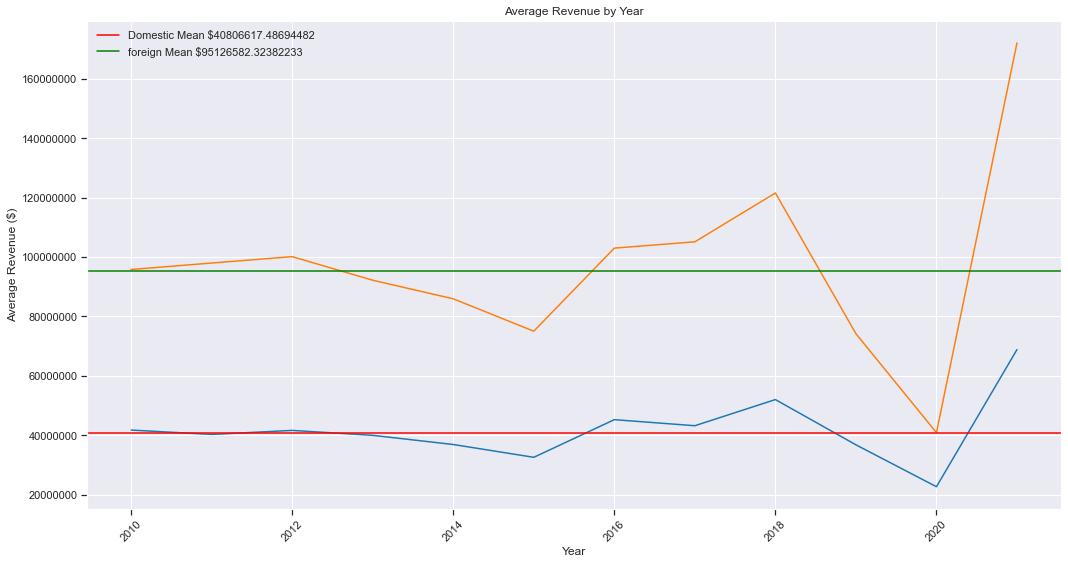

In [ ]:
# Preparing data for plotting
domestic_mean = revenue_dist['domestic_gross($)'].mean()
foreign_mean = revenue_dist['worldwide_gross($)'].mean()

# Setting plot style
plt.style.use('seaborn-darkgrid')
sns.set_context('notebook')

# Plotting average revenue trends by year
# Plot figure
plt.figure(figsize=(15, 8))

# plotting a line graph
sns.lineplot(data= revenue_dist, x='start_year', y='domestic_gross($)', estimator='mean', ci=None)
sns.lineplot(data= revenue_dist, x='start_year', y='worldwide_gross($)', estimator='mean', ci=None)
plt.axhline(domestic_mean, color= 'red', label=f'Domestic Mean ${domestic_mean}')
plt.axhline(foreign_mean, color= 'green', label=f'foreign Mean ${foreign_mean}')

# Setting titles and labels
plt.title('Average Revenue by Year')
plt.ylabel('Average Revenue ($)')
plt.xlabel('Year')

# Other settings.
plt.xticks(rotation=45)
plt.ticklabel_format(style= 'plain')
plt.legend()
plt.tight_layout()
plt.show()

##### Conclusion
The above plot helps us understand the revenue distribution over years, comparing them to the overall means.

#### Movies with the highest revenues
We have seen how films peformed yearly, in this section we'll be looking at movies with the highest revenues. This process will focus on the top 20 highest performing films both domestically and internationally over the years. It will help us figure out if there's any pattern.

We will be working with a barplot to compare the revenues.

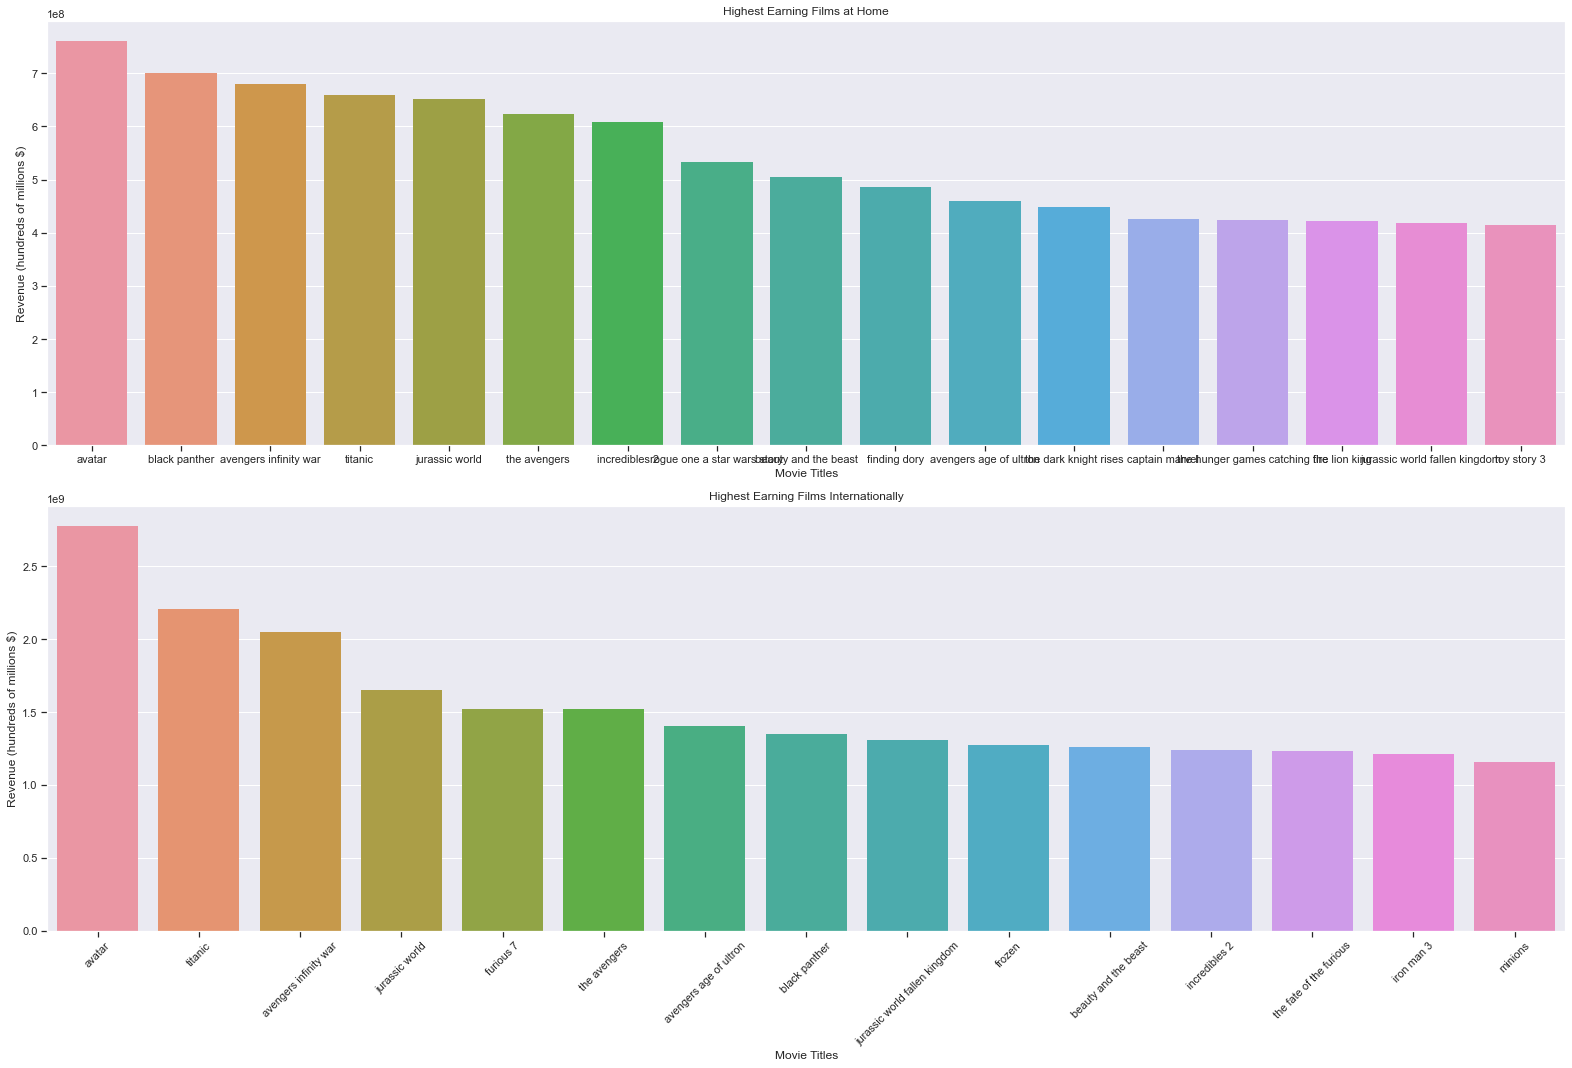

In [ ]:
# plotting the highest earning films both domestic and foreign
# preparing data for plotting
domestic_revs = revenue_dist[['primary_title', 'domestic_gross($)']].sort_values(by= 'domestic_gross($)', ascending= False)
foreign_revs = revenue_dist[['primary_title', 'worldwide_gross($)']].sort_values(by= 'worldwide_gross($)', ascending= False)

title_dom = list(domestic_revs['primary_title'])
dom_gross = list(domestic_revs['domestic_gross($)'])

title_foreign = list(foreign_revs['primary_title'])
foreign_gross = list(foreign_revs['worldwide_gross($)'])

ax1_x = title_dom[:20]
ax1_y = dom_gross[:20]

ax2_x = title_foreign[:20]
ax2_y = foreign_gross[:20]

# setting titles and labels
title1 = 'Highest Earning Films at Home'
title2 = 'Highest Earning Films Internationally'

labely = 'Revenue (hundreds of millions $)'
labelx = 'Movie Titles'

# plotting
fig, (ax1, ax2) = plt.subplots(figsize= (22, 15), nrows= 2)

sns.barplot(x= ax1_x, y= ax1_y, ax= ax1)
sns.barplot(x= ax2_x, y= ax2_y, ax= ax2)

# Setting titles and labels
ax1.set_title(title1)
ax1.set_ylabel(labely)
ax1.set_xlabel(labelx)

ax2.set_title(title2)
ax2.set_ylabel(labely)
ax2.set_xlabel(labelx)

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### Conclusion
From the plot above, we notice that most movies performed extremely well in both demestic and international settings, earning several millions in domestic revenue and even more in internation revenue.

For example, holding the highest earning film position both intenationally and domestic, Avatar earned an estimate of $2.7 billion and $750 million repectively in revenue.

### Directors associated high-performing films.
In this section we are going to filter data, grouping the directors with the most directed films above the 80% quantile in both domestic and international settings. 

We will be using SQLite3 to access data in the cleaned_imdb.db database and pandas to merge dataframes.

In [ ]:
# This code queries the directors table and joins it with the persons table using the persons_id columns on both tables.
#  This combination will help us get information about the movies the directors directed and also give us their names.

directors_data = pd.read_sql('''SELECT *
                                FROM directors
                                JOIN persons
                                USING(person_id)
                                ''', conn)

# preview of the created dataframe
directors_data.head()

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
2,tt0835418,nm0151540,Jay Chandrasekhar,"director,actor,writer"
3,tt0878654,nm0089502,Albert Pyun,"director,writer,producer"
4,tt0878654,nm2291498,Joe Baile,"producer,director,camera_department"


We are going to merge the revenue_dist information with the directors data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the directors_data.

This will gives us information about the movie name the directors directed and how it performed international and domestic.

In [ ]:
# This code merges the revenue_dist information with the directors data using the .merge() function using the movie_id columns and the a left join

film_directors = revenue_dist.merge(directors_data, on= 'movie_id', how= 'left')
film_directors.head()

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),person_id,primary_name,primary_profession
0,tt1680045,360,2011,100000.0,1.600000e+06,nm0576987,Fernando Meirelles,"producer,director,writer"
1,tt8547560,360,2018,100000.0,1.600000e+06,nm3403938,Olena Fetisova,"producer,director,writer"
2,tt1775309,avatar,2011,760507625.0,2.776345e+09,nm3786927,Atsushi Wada,director
3,tt1298650,pirates of the caribbean on stranger tides,2011,241063875.0,1.045664e+09,nm0551128,Rob Marshall,"director,miscellaneous,producer"
4,tt6565702,dark phoenix,2019,42762350.0,1.497624e+08,nm1334526,Simon Kinberg,"producer,writer,director"


In [ ]:
# The merge introduced noise into the data, we are using .info() to make sure we are working with a clean data 
film_directors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4151 entries, 0 to 4150
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            4151 non-null   object 
 1   primary_title       4151 non-null   object 
 2   start_year          4151 non-null   int64  
 3   domestic_gross($)   4151 non-null   float64
 4   worldwide_gross($)  4151 non-null   float64
 5   person_id           4067 non-null   object 
 6   primary_name        4067 non-null   object 
 7   primary_profession  4067 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 291.9+ KB


The data contains missing values in the 3 columns we joined from the directors_data dataset. In the next code we are going to drop those columns to have a clean data.

In [ ]:
# We are dropping the rows containing missing values. 

film_directors =  film_directors.dropna(subset= ['person_id', 'primary_name', 'primary_profession'])

# We are running this code to ensure that there are no null values left.
missing = revenue_dist.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

We decided on the 80% quantile for our threshold to consider a film a high-earning film.

In this section we are going to;
- Calculate the thresholds 

- Filter data that pass the thresholds

- Visualize the directors with the most films that passed the thresh.


In [ ]:
# Calculating the domestic revenue threshold
high_rev_threshold_domestic = film_directors['domestic_gross($)'].quantile(0.80)
print(f'Domestic threshold: {high_rev_threshold_domestic}')

# Calculate the foreign revenue threshhold
high_rev_threshold_foreign = film_directors['worldwide_gross($)'].quantile(0.80)
print(f'Foreign threshold: {high_rev_threshold_foreign}')

Domestic threshold: 62460723.800000034
Foreign threshold: 128941893.00000001


In [ ]:
# Filter data to contain films that are in the 80th quantile.
highest_revenue = film_directors[(film_directors['domestic_gross($)'] > high_rev_threshold_domestic) & (film_directors['worldwide_gross($)'] > high_rev_threshold_foreign)]

highest_revenue = highest_revenue[['primary_name', 'primary_title', 'domestic_gross($)', 'worldwide_gross($)']]

highest_revenue.head()

,primary_name,primary_title,domestic_gross($),worldwide_gross($)
2,Atsushi Wada,avatar,760507625.0,2.776345e+09
3,Rob Marshall,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09
5,Joss Whedon,avengers age of ultron,459005868.0,1.403014e+09
6,Anthony Russo,avengers infinity war,678815482.0,2.048134e+09
7,Joe Russo,avengers infinity war,678815482.0,2.048134e+09


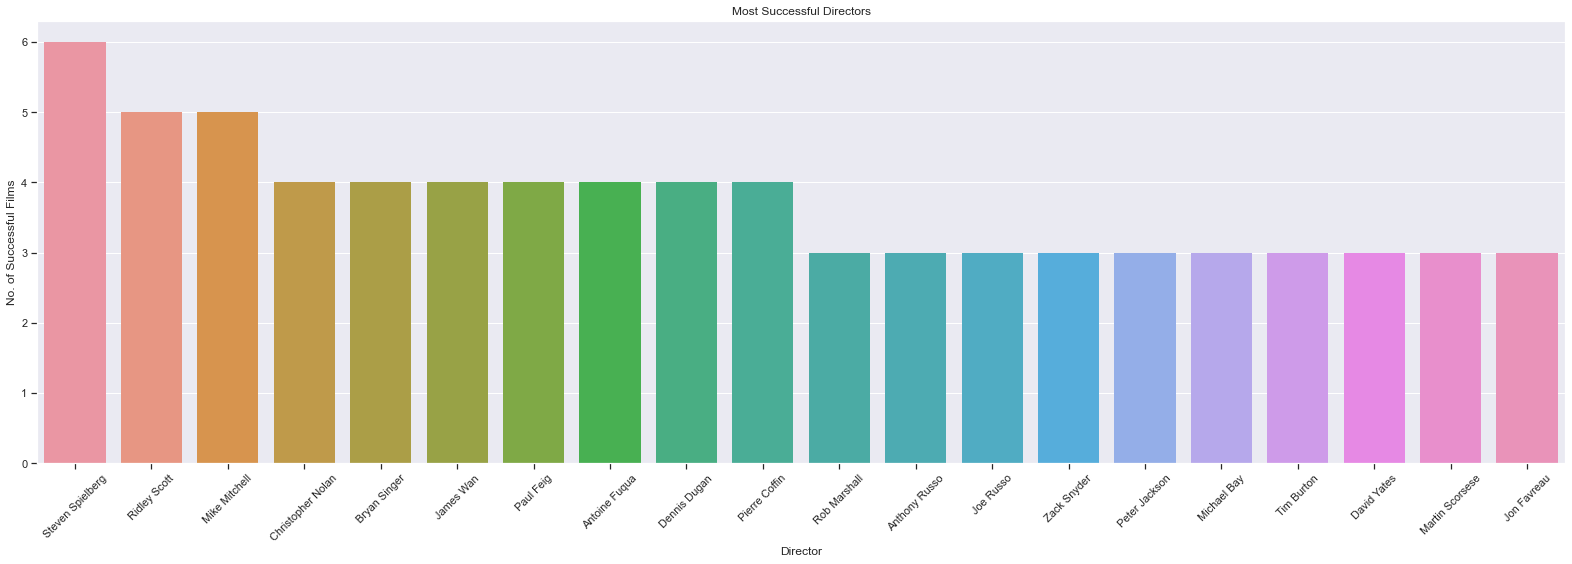

In [ ]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the directors in the highest_revenue data
directors_list = list(highest_revenue['primary_name'])

# converting the list to a dictionary that holds director's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 directors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# Preparing data for plotting
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting most successful directors
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Directors')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
high_rev_directors = name

#### Conclusion 
We conclude that the most successful directors according to high performing films include 'Steven Spielberg', 'M. Night Shyamalan', 'Ridley Scott', 'Mike Mitchell', 'Christopher Nolan', 'Tim Burton', 'James Wan', 'Bryan Singer', 'Pierre Coffin', 'Chris Renaud', 'Todd Phillips', 'Michael Bay' among others.


### Directors associated with high earnings films but with low production budget
Part of the objectives is identifying directors who produced films on low budgets and the films performed exceptionally well. In this section we going to access the production_budgets data from the cleaned database and merge it with our highest_revenue data and calculate the low budget threshold and filter the data.

This is going to help us;
- Access the highest_revenue movies' production budgets

- Identify directors who can work with limited resources


In [ ]:
# Using SQLite3 to retrieve the production_budgets dataset

production_budgets = pd.read_sql('''SELECT *
                                    FROM production_budgets''', conn)

# Previewing the dataframe
production_budgets.head()

,movie,production_budget($)
0,avatar,425000000
1,pirates of the caribbean on stranger tides,410600000
2,dark phoenix,350000000
3,avengers age of ultron,330600000
4,star wars ep viii the last jedi,317000000


In [ ]:
# This will help us identify the low budget threshold.
production_budgets.describe()

,production_budget($)
count,5.782000e+03
mean,3.158776e+07
std,4.181208e+07
min,1.100000e+03
25%,5.000000e+06
50%,1.700000e+07
75%,4.000000e+07
max,4.250000e+08


We are merging the revenue_dist information with the production_budgets data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the production_budgets data.

This will provide us with information on the movie name, the director, how it performed international and domestic as well as its production budget

In [ ]:
# The production_budgets' movie title column differs from the highest_revenue column
# This code renames the column to enable smooth merging
production_budgets.rename(columns={'movie': 'primary_title'}, inplace= True)

# Merging the highest_revenue data with the production_budgets using the primary_title.
directors_budget = highest_revenue.merge(production_budgets, on= 'primary_title', how= 'left')

directors_budget.head()

,primary_name,primary_title,domestic_gross($),worldwide_gross($),production_budget($)
0,Atsushi Wada,avatar,760507625.0,2.776345e+09,425000000
1,Rob Marshall,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,410600000
2,Joss Whedon,avengers age of ultron,459005868.0,1.403014e+09,330600000
3,Anthony Russo,avengers infinity war,678815482.0,2.048134e+09,300000000
4,Joe Russo,avengers infinity war,678815482.0,2.048134e+09,300000000


In [ ]:
# Calculating the low budget threshold

low_budget_thresh = production_budgets['production_budget($)'].quantile(0.40)
print(f'Low production budget threshold: {low_budget_thresh}')

# This code filters out the record that have budgets lower than the budget threshold.
low_budget_high_rev = directors_budget[directors_budget['production_budget($)'] < low_budget_thresh]

low_budget_high_rev.head()

Low production budget threshold: 11000000.0


,primary_name,primary_title,domestic_gross($),worldwide_gross($),production_budget($)
41,Thiago J. Silva,king kong,218080025.0,5.505174e+08,672000
54,Tim Burton,alice in wonderland,334191110.0,1.025491e+09,3000000
56,Giuseppe Malpasso,alice in wonderland,334191110.0,1.025491e+09,3000000
58,Fernando J. Scarpa,alice in wonderland,334191110.0,1.025491e+09,3000000
60,James Fotopoulos,alice in wonderland,334191110.0,1.025491e+09,3000000


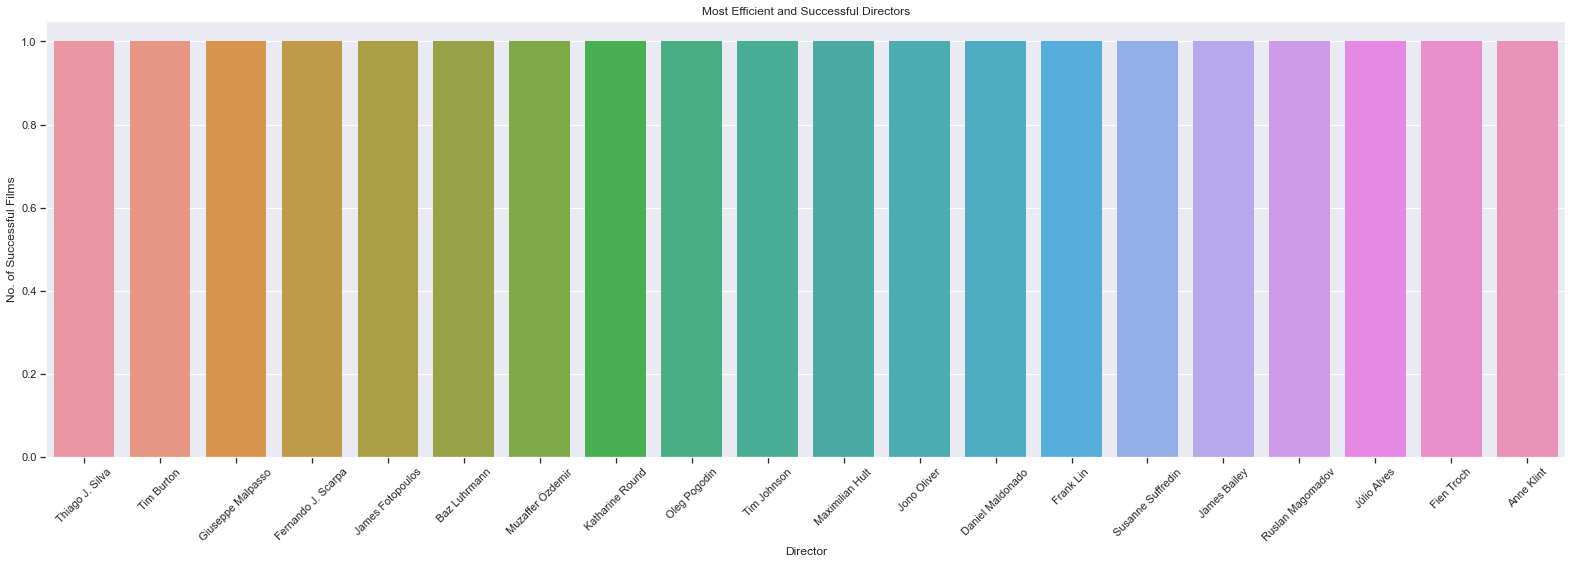

In [ ]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the directors in the low_budget_high_rev data
directors_list = list(low_budget_high_rev['primary_name'])

# converting the list to a dictionary that holds director's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 efficient and successful directors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most 
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Efficient and Successful Directors')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Director')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
low_budget_directors = name

In [ ]:
effecient_directors = []

for x in high_rev_directors:
    if x in low_budget_directors:
        effecient_directors.append(x)

effecient_directors

['Tim Burton']

#### Conclusion
We have identified M. Night Shyamalan', 'Tod Williams', 'Ariel Schulman', 'Henry Joost', 'John R. Leonetti', 'Jamie Buckner', 'Deborah Kampmeier', 'Robbie Walsh', 'Lawrence Côté-Collins', 'Kook-Hee Choi', 'Thiago J. Silva', 'Tim Burton', 'Giuseppe Malpasso', and 'Fernando J. Scarpa', among other directors to be the most efficient and successful directors. Their production works used very low budgets and yielded very high revenue.

Among the directors named above, we have identified that 'M. Night Shyamalan' and 'Tim Burton' are the most efficient of all, having graced both director charts as the most successful and most efficient.


In [ ]:
# This code retrieves the info for the movies directed in the plot above
# We are creating a new column in the low_budget_high_rev dataframe.
low_budget_high_rev['examples'] = low_budget_high_rev['primary_name'].isin(name)

# This code retrieves the info for the movies directed 
work_review = low_budget_high_rev[low_budget_high_rev['examples'] == True]

#previewing the data
work_review.head()

<ipython-input-403-bf33f7a45a4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_budget_high_rev['examples'] = low_budget_high_rev['primary_name'].isin(name)


,primary_name,primary_title,domestic_gross($),worldwide_gross($),production_budget($),examples
41,Thiago J. Silva,king kong,218080025.0,5.505174e+08,672000,True
54,Tim Burton,alice in wonderland,334191110.0,1.025491e+09,3000000,True
56,Giuseppe Malpasso,alice in wonderland,334191110.0,1.025491e+09,3000000,True
58,Fernando J. Scarpa,alice in wonderland,334191110.0,1.025491e+09,3000000,True
60,James Fotopoulos,alice in wonderland,334191110.0,1.025491e+09,3000000,True


No handles with labels found to put in legend.


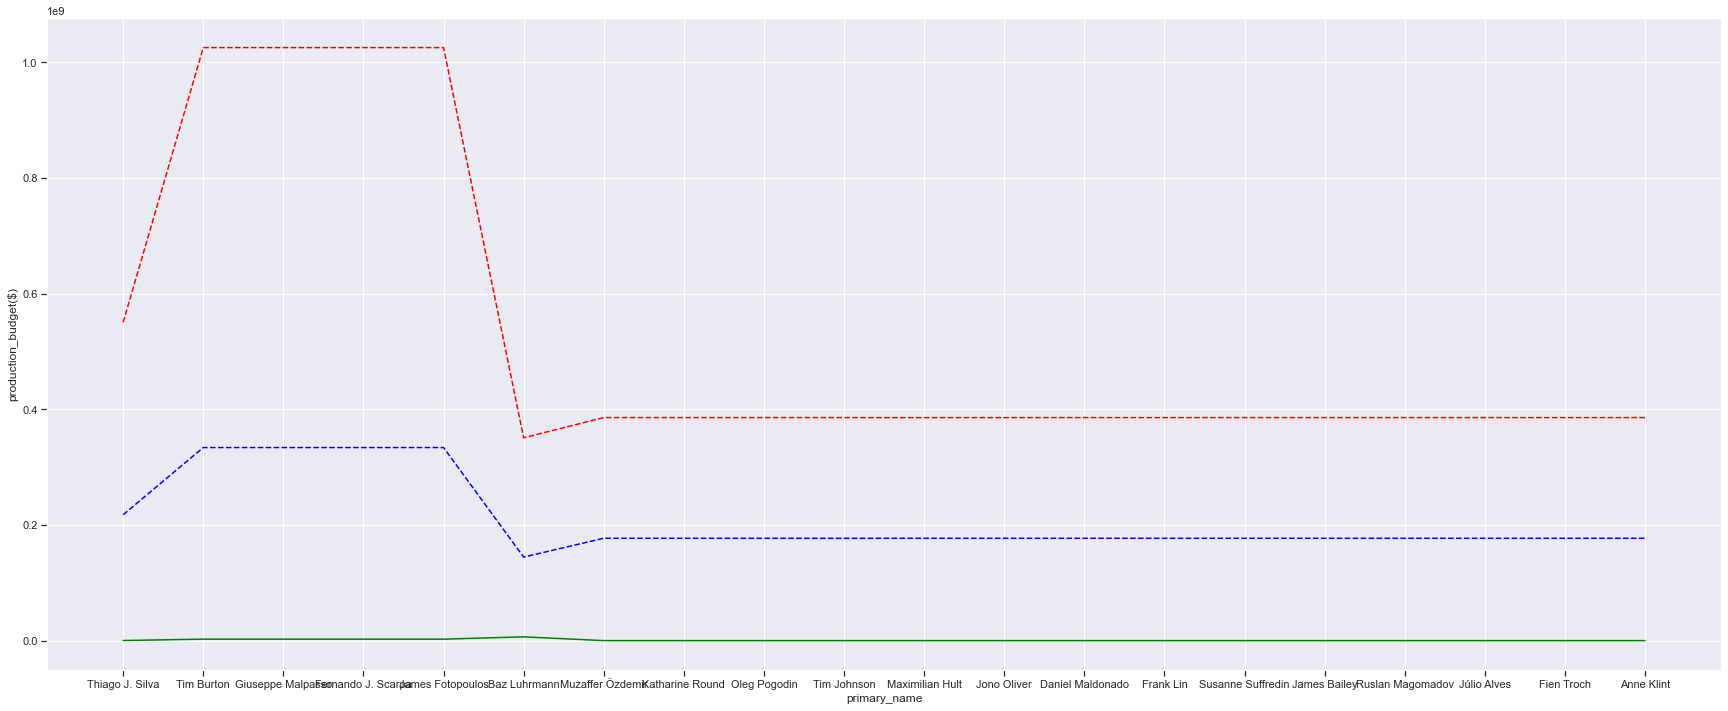

In [ ]:
fig, (ax1) = plt.subplots(figsize= (30, 12))

sns.lineplot(data= work_review, x= 'primary_name', y= 'production_budget($)', ax= ax1, markers= 'o', color='green')
sns.lineplot(data= work_review, x= 'primary_name', y= 'domestic_gross($)', ax= ax1, markers= 'o', linestyle= '--', linewidth= 1.5, color= 'blue')
sns.lineplot(data= work_review, x= 'primary_name', y= 'worldwide_gross($)', ax= ax1, markers= 'o', linewidth= 1.5, color= 'red', linestyle= '--')
plt.legend()

### Actors whose presence significantly correlates with high box office returns, suggesting their popularity.
In this section we are going to identify actors and actresses whose presence correlates with highest films returns. We will be using the `actors_and_actresses` data, the `persons` data as well as the revenue_dist data to identify them.

This process will include;
- Data retrieval

- Data engineering - to fit our purpose

- Visualization

In [ ]:
# This code uses SQLite3 to retrieve data from the actors_and_actresses table in the cleaned database and in a left join retrieves data from the persons table.

actors = pd.read_sql('''SELECT *
                        FROM actors_and_actresses
                        LEFT JOIN persons
                        USING(person_id)''', conn)

# Previewing the dataframe
actors.head()

,movie_id,ordering,person_id,category,characters,primary_name,primary_profession
0,tt0111414,1,nm0246005,actor,"[""The Man""]",Tommy Dysart,actor
1,tt0323808,1,nm3579312,actress,"[""Beth Boothby""]",Brittania Nicol,"actress,soundtrack"
2,tt0323808,2,nm2694680,actor,"[""Steve Thomson""]",Henry Garrett,actor
3,tt0323808,3,nm0574615,actor,"[""Sir Lachlan Morrison""]",Graham McTavish,"actor,soundtrack,director"
4,tt0323808,4,nm0502652,actress,"[""Lady Delia Morrison""]",Jacqueline Leonard,actress


We are merging the revenue_dist information with the actors data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the actors data.

This will provide us with information on the movie name, the actor, how it performed international and domestic.

In [ ]:
# We are merging the revenue_dist data with the actors data using the movie_id column

actors_movies = revenue_dist.merge(actors, on= 'movie_id', how= 'left')

# Previewing the data
actors_movies.head()

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),ordering,person_id,category,characters,primary_name,primary_profession
0,tt1680045,360,2011,100000.0,1600000.0,1.0,nm0001838,actress,"[""Rose""]",Rachel Weisz,"actress,producer,soundtrack"
1,tt1680045,360,2011,100000.0,1600000.0,2.0,nm0000179,actor,"[""Michael Daly""]",Jude Law,"actor,producer,soundtrack"
2,tt1680045,360,2011,100000.0,1600000.0,3.0,nm0000164,actor,"[""John""]",Anthony Hopkins,"actor,soundtrack,composer"
3,tt1680045,360,2011,100000.0,1600000.0,4.0,nm0004936,actor,"[""Tyler""]",Ben Foster,"actor,director,writer"
4,tt8547560,360,2018,100000.0,1600000.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# In this code we are filtering the actors_movies data by adding only the columns relevant to this analysis.
actors_movies = actors_movies[['primary_title', 'domestic_gross($)', 'worldwide_gross($)', 'category', 'characters', 'primary_name']]

# Here we are filtering data that meet the high revenue thresholds
actors_movies = actors_movies[(actors_movies['domestic_gross($)'] > high_rev_threshold_domestic) & (actors_movies['worldwide_gross($)'] > high_rev_threshold_foreign)]

# Previewing the filtered data
actors_movies.head()

,primary_title,domestic_gross($),worldwide_gross($),category,characters,primary_name
5,avatar,760507625.0,2.776345e+09,NaN,NaN,NaN
6,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,actor,"[""Jack Sparrow""]",Johnny Depp
7,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,actress,"[""Angelica""]",Penélope Cruz
8,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,actor,"[""Blackbeard""]",Ian McShane
9,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,actor,"[""Barbossa""]",Geoffrey Rush


In [ ]:
# To ensure our data is clean, we are going to check the summary

actors_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2259 entries, 5 to 12364
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       2259 non-null   object 
 1   domestic_gross($)   2259 non-null   float64
 2   worldwide_gross($)  2259 non-null   float64
 3   category            2191 non-null   object 
 4   characters          2191 non-null   object 
 5   primary_name        2105 non-null   object 
dtypes: float64(2), object(4)
memory usage: 123.5+ KB


The merged data has introduced noise to our dataset. The next course of action is dropping the affected rows to maintain a clean data.

- We will be using the .dropna() function

In [ ]:
# Dropping all null values
actors_movies.dropna(inplace=True)

# We are running this code to ensure that there are no null values left.
missing = actors_movies.isnull().sum()
missing[missing > 0].sort_values(ascending=False)

Series([], dtype: int64)

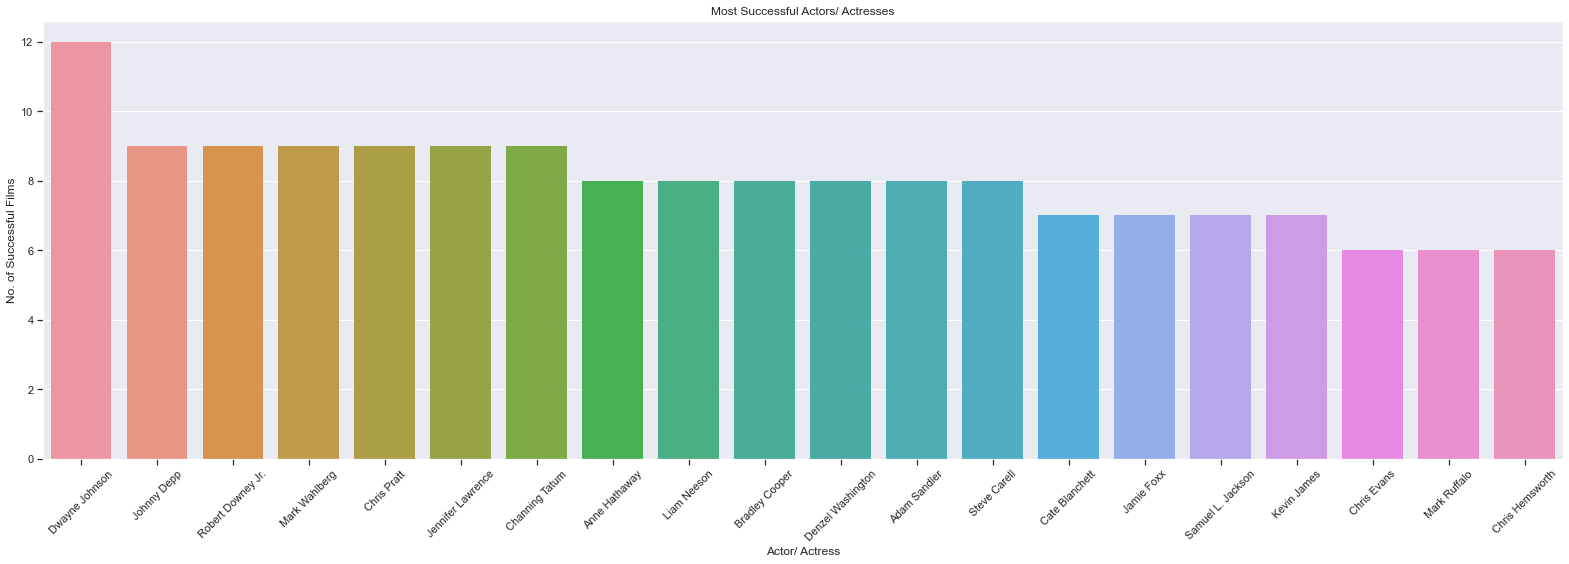

In [ ]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the actors and actresses in the actors_movies data
directors_list = list(actors_movies['primary_name'])

# converting the list to a dictionary that holds actor's and actress' name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 successful actors/ actresses with the most films above the threshholds.
final_data = director_tuple_sorted[:20]


# plotting most succeful actors
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Actors/ Actresses')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Actor/ Actress')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusion
We have identified 'Dwayne Johnson', 'Jennifer Lawrence', 'Johnny Depp', 'Samuel L. Jackson', 'Robert Downey Jr.', 'Liam Neeson', 'Bradley Cooper', 'Anne Hathaway', 'Tom Cruise', 'Ben Kingsley', 'Jamie Foxx', 'Kristen Wiig', 'Channing Tatum', 'Cate Blanchett', 'Cameron Diaz', 'Adam Sandler', 'Kevin James', 'Owen Wilson', 'Jesse Eisenberg', 'Hugh Jackman' as the most popular actors and actresses in the film industry, having associated them with high earning films.

#### Popular actors

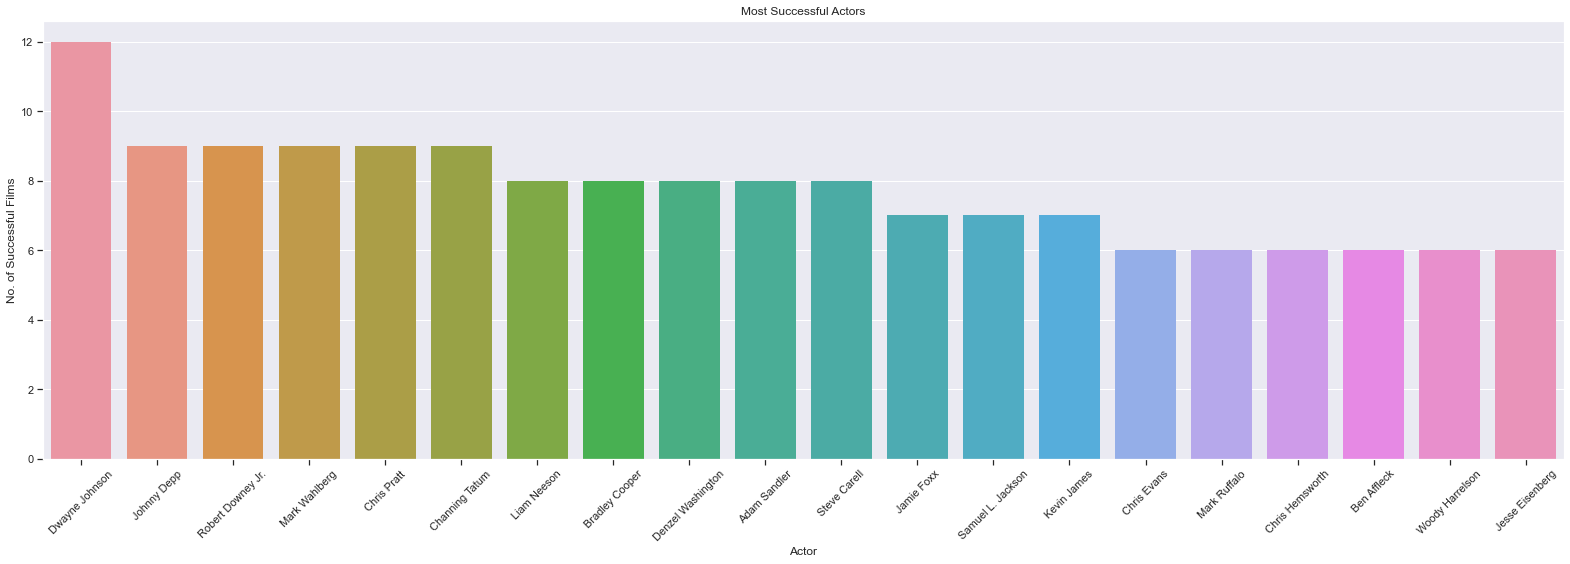

In [ ]:
# Filtering data to only retrieve the actors
popular_actors = actors_movies[actors_movies['category'] == 'actor']

# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the actors in the actors_movies data
directors_list = list(popular_actors['primary_name'])

# converting the list to a dictionary that holds actor's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 successful actors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most succeful actors
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Successful Actors')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Actor')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusion
We identified that 'Dwayne Johnson', 'Johnny Depp', 'Samuel L. Jackson', 'Robert Downey Jr.', 'Liam Neeson', 'Bradley Cooper', 'Tom Cruise', 'Ben Kingsley', 'Jamie Foxx', 'Channing Tatum' are the top ten most popular actors in the industry. Their presence in films contribute greatly to the film's performance.

#### Popular actresses

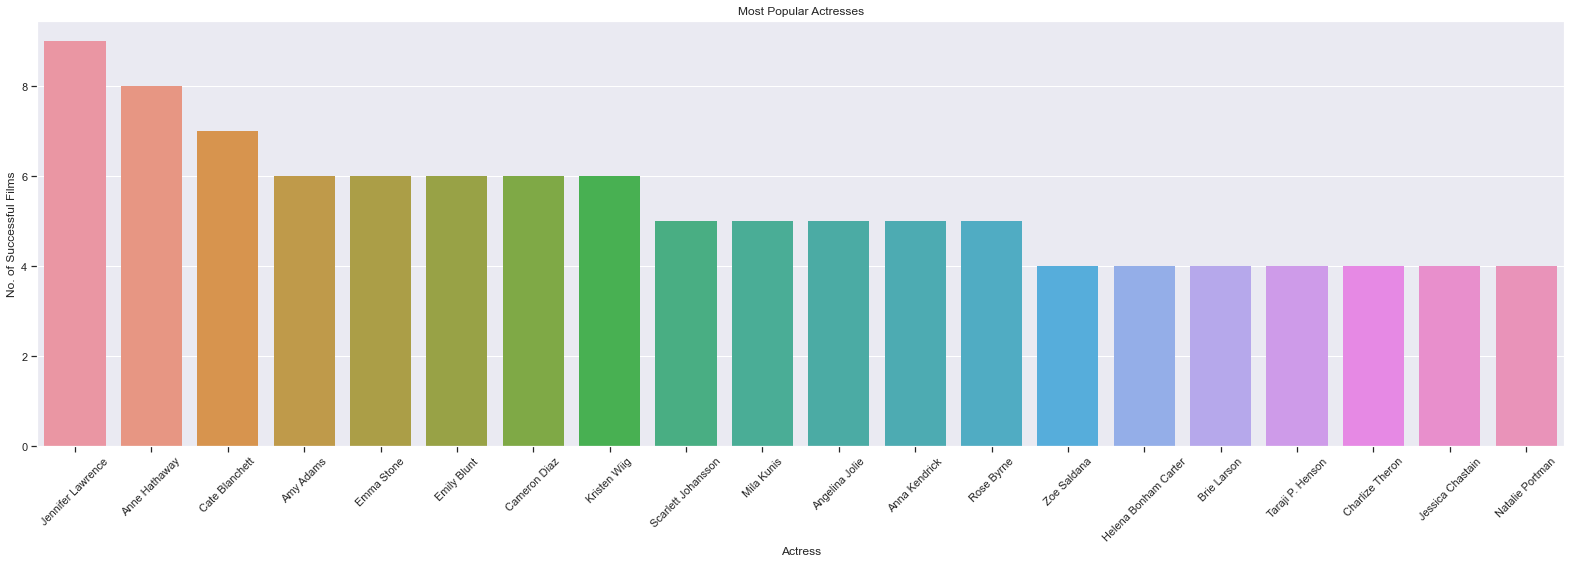

In [ ]:
popular_actresses = actors_movies[actors_movies['category'] == 'actress']

# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the actresses in the actors_movies data
directors_list = list(popular_actresses['primary_name'])

# converting the list to a dictionary that holds actress' name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 successful actors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most succeful actoresses
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Popular Actresses')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Actress')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusion
We identified that 'Jennifer Lawrence', 'Anne Hathaway', 'Kristen Wiig', 'Cate Blanchett', 'Cameron Diaz', 'Angelina Jolie', 'Rose Byrne', 'Mila Kunis', 'Scarlett Johansson', and 'Anna Faris', are the top ten most popular actresses at the moment.

### Identify writers associated with high earning films.
Writers are the most crucial part of any production teams. In this section we are identifying writers associated with the highest performing films in the industry, analyzing how many films they have written and their influence on the films.

This process is going to involve;
- Data engineering

- Visualizations

In [ ]:
# This code uses SQLite3 to retrieve data from the writers table in the cleaned database and in a left join retrieves data from the persons table.
writers = pd.read_sql('''SELECT *
                         FROM writers
                         LEFT JOIN persons
                         USING(person_id)''', conn)

# Previewing the dataframe
writers.head()

,movie_id,person_id,primary_name,primary_profession
0,tt0285252,nm0899854,Tony Vitale,"producer,director,writer"
1,tt0438973,nm0175726,Steve Conrad,"writer,producer,director"
2,tt0438973,nm1802864,Sean Sorensen,"producer,writer"
3,tt0462036,nm1940585,Bill Haley,"director,writer,producer"
4,tt0835418,nm0310087,Peter Gaulke,"writer,actor,director"


We are merging the revenue_dist information with the writers data retrieving everything from the revenue_dist dataframe and only records existing in the revenue_dist dataframe from the writers data.

This will provide us with information on the movie name, the writer, and how it performed international and domestic.

In [ ]:
# Merging the revenue_dist with the writers data using the movie_id column
popular_writers = revenue_dist.merge(writers, on= 'movie_id', how= 'left')

# Previewing the merged data
popular_writers.head()

,movie_id,primary_title,start_year,domestic_gross($),worldwide_gross($),person_id,primary_name,primary_profession
0,tt1680045,360,2011,100000.0,1.600000e+06,nm0604948,Peter Morgan,"writer,producer,actor"
1,tt1680045,360,2011,100000.0,1.600000e+06,nm0774217,None,None
2,tt8547560,360,2018,100000.0,1.600000e+06,nm3403938,Olena Fetisova,"producer,director,writer"
3,tt1775309,avatar,2011,760507625.0,2.776345e+09,nm2179863,Yûsuke Yamada,writer
4,tt1775309,avatar,2011,760507625.0,2.776345e+09,nm4392664,Teruo Noguchi,"director,writer,editor"


In [ ]:
# In this code we are filtering the popular data by adding only the columns relevant to this analysis.
popular_writers = popular_writers[['primary_title', 'domestic_gross($)', 'worldwide_gross($)', 'primary_name']]

# We are filtering data that meet the highest revenue thresholds
popular_writers = popular_writers[(popular_writers['domestic_gross($)'] > high_rev_threshold_domestic) & (popular_writers['worldwide_gross($)'] > high_rev_threshold_foreign)]

# Previewing the filtered data
popular_writers.head()

,primary_title,domestic_gross($),worldwide_gross($),primary_name
3,avatar,760507625.0,2.776345e+09,Yûsuke Yamada
4,avatar,760507625.0,2.776345e+09,Teruo Noguchi
5,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,Ted Elliott
6,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,Terry Rossio
7,pirates of the caribbean on stranger tides,241063875.0,1.045664e+09,Stuart Beattie


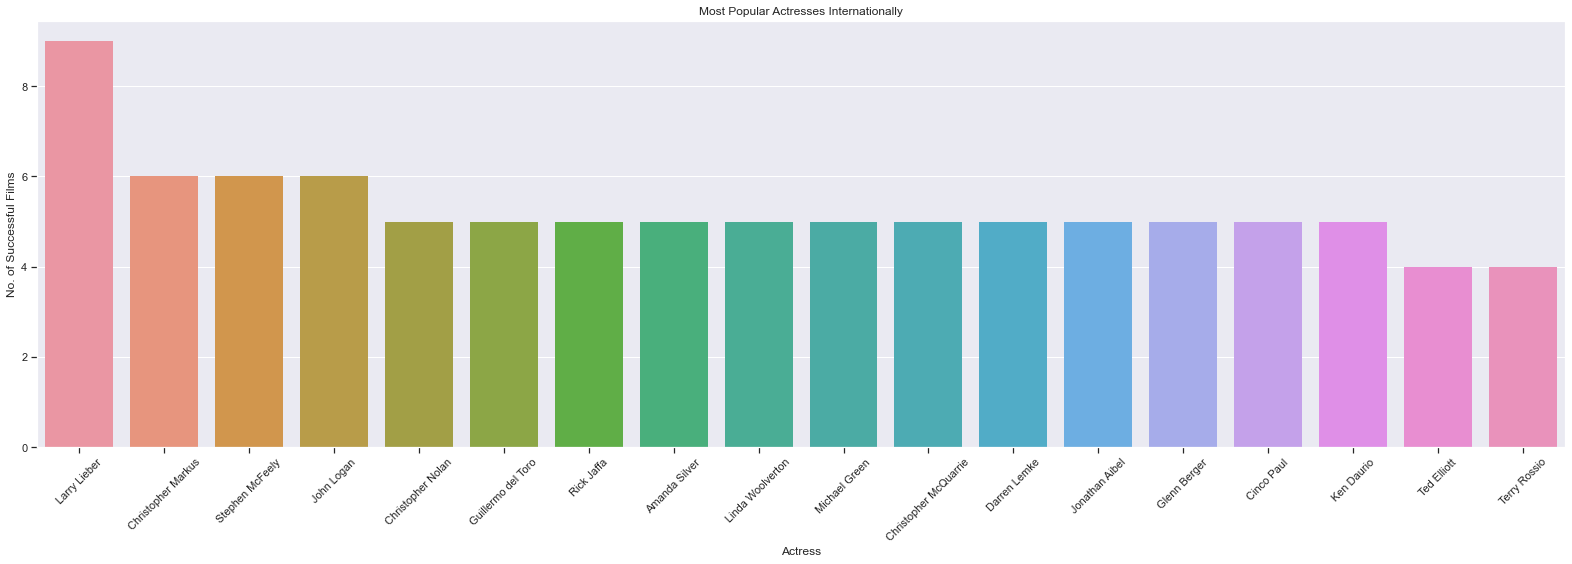

In [ ]:
# In this code, we are preparing our data for plotting.
# First, we are creating a list of all the directors in the low_budget_high_rev data
directors_list = list(popular_writers['primary_name'])

# converting the list to a dictionary that holds director's name and how many times they appear
directors_dict = {}
for x in directors_list:
    if x not in directors_dict:
        directors_dict[x] = 1
    else:
        directors_dict[x] += 1

# Coverting the dictionary to a list of tuples and sorting them in a descending order.
# We are using the lambda function to specify the element the sorting should be based on
director_tuple = list(directors_dict.items())
director_tuple_sorted = sorted(director_tuple, key= lambda x: x[1], reverse= True)

# Retrieving the first 20 efficient and successful directors with the most films above the threshholds.
final_data = director_tuple_sorted[:20]

# plotting most succeful directors internationally
# Preparing data
count = [x[1] for x in final_data]
name = [x[0] for x in final_data]

# plotting
fig, ax = plt.subplots(figsize= (22, 8))
sns.barplot(x= name, y= count, ax=ax)

# Setting title and labels
ax.set_title('Most Popular Actresses Internationally')
ax.set_ylabel('No. of Successful Films')
ax.set_xlabel('Actress')

# Other settings.
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### Conclusion
We identified that 'Larry Lieber', 'Christopher McQuarrie', 'John Logan', 'M. Night Shyamalan', 'Christopher Markus', 'Stephen McFeely', 'Michael Green', 'Christopher Nolan', 'Guillermo del Toro', 'Mark Bomback', 'Jane Goldman', 'Glenn Berger', 'Jonathan Aibel', 'Linda Woolverton', 'Michael Arndt', 'Darren Lemke', 'Ted Elliott', and 'Terry Rossio' are the most brilliant writers in the film industry. Most of their movies have appeared more than once in the highest revenue charts.

# PREDICTION
Most movie studios and production companies often maintain internal databases or "catalogs" of actors they have worked with or are interested in. These catalogs are used to track actors' performance, experience, and any other relevant information for future casting decisions.

In this section we are going to work on different production crew personel to predic whether their presence in a film will really push salea nad revenue.

#### DIRECTORS

In [ ]:
highest_revenue.head()

,primary_name,primary_title,domestic_gross($),worldwide_gross($)
0,Lee Unkrich,Toy Story 3,415000000.0,652000000.0
1,Mike Mitchell,Shrek Forever After,238700000.0,513900000.0
2,David Slade,The Twilight Saga: Eclipse,300500000.0,398000000.0
3,Nathan Greno,Tangled,200800000.0,391000000.0
4,Byron Howard,Tangled,200800000.0,391000000.0


In [ ]:
def calculate_mean(row):
    sum = row['domestic_gross($)'] + row['worldwide_gross($)']
    mean = sum / 2

    return mean

highest_revenue['avg_rev'] = highest_revenue.apply(calculate_mean, axis=1)

highest_revenue.head()

,primary_name,primary_title,domestic_gross($),worldwide_gross($),avg_rev
0,Lee Unkrich,Toy Story 3,415000000.0,652000000.0,533500000.0
1,Mike Mitchell,Shrek Forever After,238700000.0,513900000.0,376300000.0
2,David Slade,The Twilight Saga: Eclipse,300500000.0,398000000.0,349250000.0
3,Nathan Greno,Tangled,200800000.0,391000000.0,295900000.0
4,Byron Howard,Tangled,200800000.0,391000000.0,295900000.0


In [ ]:
# encoding
encoded_directors = highest_revenue.groupby('primary_name')['avg_rev'].mean().to_dict()
highest_revenue['director_score'] = highest_revenue['primary_name'].map(encoded_directors)

highest_revenue.head()

,primary_name,primary_title,domestic_gross($),worldwide_gross($),avg_rev,director_score
0,Lee Unkrich,Toy Story 3,415000000.0,652000000.0,533500000.0,468525000.0
1,Mike Mitchell,Shrek Forever After,238700000.0,513900000.0,376300000.0,238361989.0
2,David Slade,The Twilight Saga: Eclipse,300500000.0,398000000.0,349250000.0,349250000.0
3,Nathan Greno,Tangled,200800000.0,391000000.0,295900000.0,295900000.0
4,Byron Howard,Tangled,200800000.0,391000000.0,295900000.0,403900000.0


In [ ]:
highest_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 4260
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_name        694 non-null    object 
 1   primary_title       694 non-null    object 
 2   domestic_gross($)   694 non-null    float64
 3   worldwide_gross($)  694 non-null    float64
 4   avg_rev             694 non-null    float64
 5   director_score      694 non-null    float64
dtypes: float64(4), object(2)
memory usage: 38.0+ KB


#### ACTORS

In [ ]:
actors_movies.head()

,primary_title,domestic_gross($),worldwide_gross($),category,characters,primary_name
0,Toy Story 3,415000000.0,652000000.0,actor,"[""Woody""]",Tom Hanks
1,Toy Story 3,415000000.0,652000000.0,actor,"[""Buzz Lightyear""]",Tim Allen
2,Toy Story 3,415000000.0,652000000.0,actress,"[""Jessie""]",Joan Cusack
3,Toy Story 3,415000000.0,652000000.0,actor,"[""Lotso""]",Ned Beatty
4,Shrek Forever After,238700000.0,513900000.0,actor,"[""Shrek""]",Mike Myers


In [ ]:
def calculate_mean(row):
    sum = row['domestic_gross($)'] + row['worldwide_gross($)']
    mean = sum / 2

    return mean

actors_movies['avg_rev'] = actors_movies.apply(calculate_mean, axis=1)

actors_movies.head()

,primary_title,domestic_gross($),worldwide_gross($),category,characters,primary_name,avg_rev
0,Toy Story 3,415000000.0,652000000.0,actor,"[""Woody""]",Tom Hanks,533500000.0
1,Toy Story 3,415000000.0,652000000.0,actor,"[""Buzz Lightyear""]",Tim Allen,533500000.0
2,Toy Story 3,415000000.0,652000000.0,actress,"[""Jessie""]",Joan Cusack,533500000.0
3,Toy Story 3,415000000.0,652000000.0,actor,"[""Lotso""]",Ned Beatty,533500000.0
4,Shrek Forever After,238700000.0,513900000.0,actor,"[""Shrek""]",Mike Myers,376300000.0


In [ ]:
# encoding
encoded_actors = actors_movies.groupby('primary_name')['avg_rev'].mean().to_dict()
actors_movies['actor_score'] = actors_movies['primary_name'].map(encoded_actors)

actors_movies.head()

,primary_title,domestic_gross($),worldwide_gross($),category,characters,primary_name,avg_rev,actor_score
0,Toy Story 3,415000000.0,652000000.0,actor,"[""Woody""]",Tom Hanks,533500000.0,195375233.8
1,Toy Story 3,415000000.0,652000000.0,actor,"[""Buzz Lightyear""]",Tim Allen,533500000.0,533500000.0
2,Toy Story 3,415000000.0,652000000.0,actress,"[""Jessie""]",Joan Cusack,533500000.0,533500000.0
3,Toy Story 3,415000000.0,652000000.0,actor,"[""Lotso""]",Ned Beatty,533500000.0,533500000.0
4,Shrek Forever After,238700000.0,513900000.0,actor,"[""Shrek""]",Mike Myers,376300000.0,376300000.0


In [ ]:
actors_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 13305
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       2101 non-null   object 
 1   domestic_gross($)   2101 non-null   float64
 2   worldwide_gross($)  2101 non-null   float64
 3   category            2101 non-null   object 
 4   characters          2101 non-null   object 
 5   primary_name        2101 non-null   object 
 6   avg_rev             2101 non-null   float64
 7   actor_score         2101 non-null   float64
dtypes: float64(4), object(4)
memory usage: 147.7+ KB


In [ ]:
actor_predict = actors_movies[actors_movies['actor_score'].notnull()]
actor_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2101 entries, 0 to 13305
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       2101 non-null   object 
 1   domestic_gross($)   2101 non-null   float64
 2   worldwide_gross($)  2101 non-null   float64
 3   category            2101 non-null   object 
 4   characters          2101 non-null   object 
 5   primary_name        2101 non-null   object 
 6   avg_rev             2101 non-null   float64
 7   actor_score         2101 non-null   float64
dtypes: float64(4), object(4)
memory usage: 147.7+ KB


#### WRITERS

In [ ]:
popular_writers.head()

,primary_title,domestic_gross($),worldwide_gross($),primary_name
0,Toy Story 3,415000000.0,652000000.0,John Lasseter
1,Toy Story 3,415000000.0,652000000.0,Andrew Stanton
2,Toy Story 3,415000000.0,652000000.0,Lee Unkrich
3,Toy Story 3,415000000.0,652000000.0,Michael Arndt
4,Shrek Forever After,238700000.0,513900000.0,None


In [ ]:
def calculate_mean(row):
    sum = row['domestic_gross($)'] + row['worldwide_gross($)']
    mean = sum / 2

    return mean

popular_writers['avg_rev'] = popular_writers.apply(calculate_mean, axis=1)

popular_writers.head()

,primary_title,domestic_gross($),worldwide_gross($),primary_name,avg_rev
0,Toy Story 3,415000000.0,652000000.0,John Lasseter,533500000.0
1,Toy Story 3,415000000.0,652000000.0,Andrew Stanton,533500000.0
2,Toy Story 3,415000000.0,652000000.0,Lee Unkrich,533500000.0
3,Toy Story 3,415000000.0,652000000.0,Michael Arndt,533500000.0
4,Shrek Forever After,238700000.0,513900000.0,None,376300000.0


In [ ]:
# encoding
encoded_writers = popular_writers.groupby('primary_name')['avg_rev'].mean().to_dict()
popular_writers['writer_score'] = popular_writers['primary_name'].map(encoded_writers)

popular_writers.head()

,primary_title,domestic_gross($),worldwide_gross($),primary_name,avg_rev,writer_score
0,Toy Story 3,415000000.0,652000000.0,John Lasseter,533500000.0,3.114167e+08
1,Toy Story 3,415000000.0,652000000.0,Andrew Stanton,533500000.0,3.966333e+08
2,Toy Story 3,415000000.0,652000000.0,Lee Unkrich,533500000.0,4.685250e+08
3,Toy Story 3,415000000.0,652000000.0,Michael Arndt,533500000.0,4.375420e+08
4,Shrek Forever After,238700000.0,513900000.0,None,376300000.0,NaN


In [ ]:
movies = list(popular_writers['primary_title'])
movies

['Toy Story 3',
 'Toy Story 3',
 'Toy Story 3',
 'Toy Story 3',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'Shrek Forever After',
 'The Twilight Saga: Eclipse',
 'The Twilight Saga: Eclipse',
 'Tangled',
 'Tangled',
 'Tangled',
 'Prince of Persia: The Sands of Time',
 'Prince of Persia: The Sands of Time',
 'Prince of Persia: The Sands of Time',
 'Prince of Persia: The Sands of Time',
 'The Last Airbender',
 'Salt',
 'The Tourist',
 'The Tourist',
 'The Tourist',
 'The Tourist',
 'The Expendables',
 'The Expendables',
 'Grown Ups',
 'Grown Ups',
 "The Sorcerer's Apprentice",
 "The Sorcerer's Apprentice",
 "The Sorcerer's Apprentice",
 "The Sorcerer's Apprentice",
 "The Sorcerer's Apprentice",
 'Due Date',
 'Due Date',
 'Due Date',
 'Due Date',
 'Yogi Bear',
 'Yogi Bear',
 'Yogi Bear',
 'Yogi Bear',
 'Yogi Bear',
 '

In [ ]:
popular_writers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1773 entries, 0 to 7762
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       1773 non-null   object 
 1   domestic_gross($)   1773 non-null   float64
 2   worldwide_gross($)  1773 non-null   float64
 3   primary_name        1509 non-null   object 
 4   avg_rev             1773 non-null   float64
 5   writer_score        1509 non-null   float64
dtypes: float64(4), object(2)
memory usage: 97.0+ KB


In [ ]:
writer_predict = popular_writers[popular_writers['writer_score'].notnull()]
writer_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1509 entries, 0 to 7762
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   primary_title       1509 non-null   object 
 1   domestic_gross($)   1509 non-null   float64
 2   worldwide_gross($)  1509 non-null   float64
 3   primary_name        1509 non-null   object 
 4   avg_rev             1509 non-null   float64
 5   writer_score        1509 non-null   float64
dtypes: float64(4), object(2)
memory usage: 82.5+ KB


### Creating a catalog

In [ ]:
conn = sqlite3.connect('Production_crew_catalog.db')

cur = conn.cursor()

In [ ]:
cur.execute('''CREATE TABLE Movies(Id INTEGER
                                   Title TEXT)''')

In [ ]:
cur.execute('''CREATE TABLE Actors(id INTEGER*
                                   Name STRING
                                   Actor_Score REAL)''')

In [ ]:
cur.execute('''CREATE TABLE Writers(id INTEGER*
                                    Name TEXT
                                    Writer_score REAL
                                    Movie_Id INTEGER)''')